# Packaging Machine Learning Models with Python
## Model Packaging
Model packaging is an essential step in the Machine Learning deployment process, where the trained model is prepared in a format that can be easily deployed and integrated into production environments

## Packaging Machine Learning Models with Python
Packaging Machine Learning models involves saving it and wrapping it with an API. Here’s the process of packaging a Machine Learning model:

 1.  Step 1: Export/Save the Trained Model 2.  
Step 2: Writing a Wrapper Function to Load the Model 3.  
Step 3: Setting Up an API to Serve the Models.

# Step 1: Export/Save the Trained Model
The first step is to save it in a format that can be loaded during deployment. Different libraries have different ways of saving models

Let’s train an example model on the iris dataset and save it using the pickle method:

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import joblib

# load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# save the model using joblib
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']

# Step 2: Writing a Wrapper Function to Load the Model
 This wrapper function will be exposed through an API or used in the production environment.

In [8]:
# function to load the saved model
def load_model():
    model = joblib.load('rf_model.pkl')
    return model

# function to make predictions
def predict(input_data):
    model = load_model()
    prediction = model.predict(input_data)
    return prediction

# Step 3: Setting Up an API to Serve the Model
To serve the model in production, one can expose it via an API. Flask or FastAPI is often used to create REST APIs for this purpose.

Here’s how to set up an API to serve your model

In [1]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# load the model
model = joblib.load('rf_model.pkl')

# define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input data from POST request
    input_data = np.array(data['input']).reshape(1, -1)  # Reshape input
    prediction = model.predict(input_data)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Now, run this file. Once run this file, one can test the API using tools like Postman. Postman is a popular API development and testing tool that simplifies the process of sending requests to APIs and inspecting the responses.

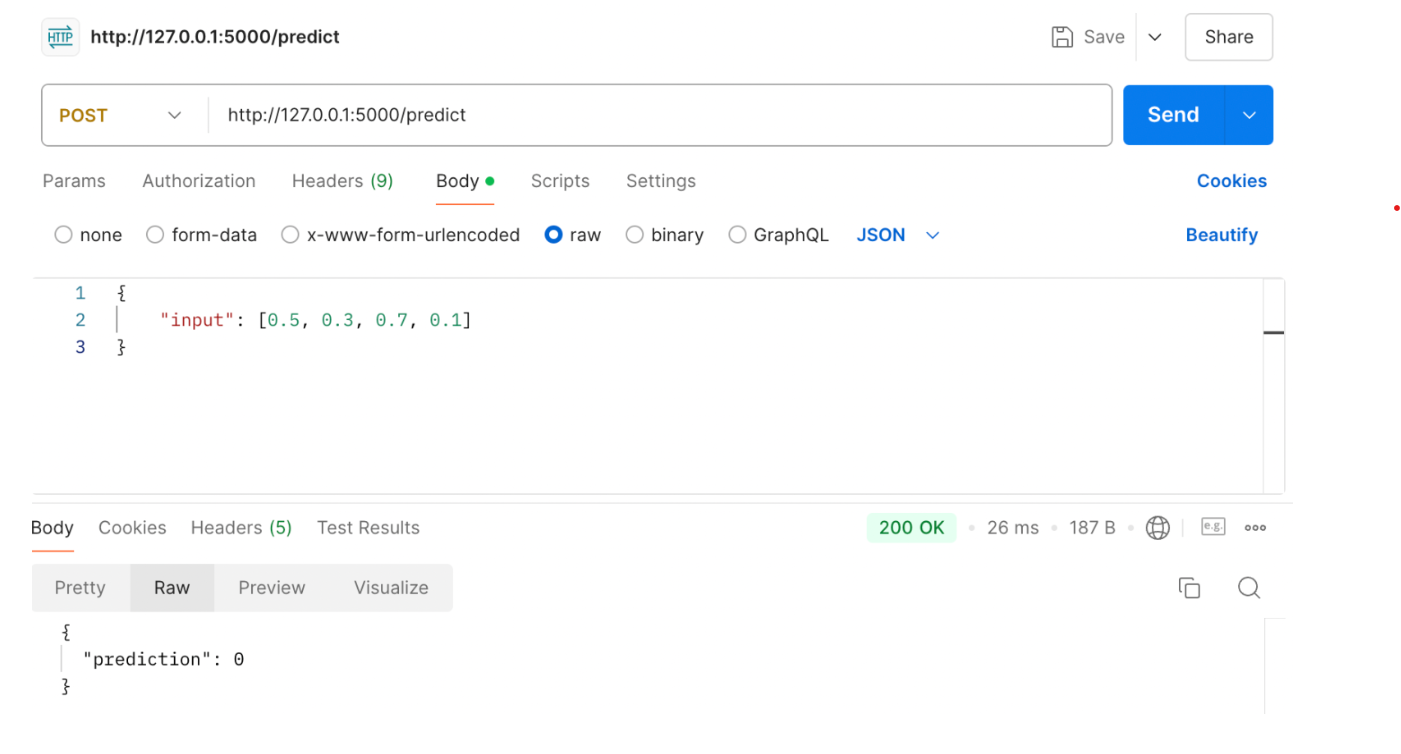